
异常数据如下：

[51.0, 6607.4, 4060.3, 865.0, 22.0, 60.0, 9106.44, 4065.2]
[Timestamp('2015-03-01 00:00:00'), Timestamp('2015-02-21 00:00:00'), Timestamp('2015-02-20 00:00:00'), Timestamp('2015-02-12 00:00:00'), Timestamp('2014-11-08 00:00:00'), Timestamp('2014-11-01 00:00:00'), Timestamp('2014-09-27 00:00:00'), Timestamp('2014-09-08 00:00:00')]


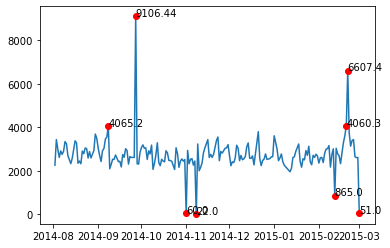

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

catering_sale =  'C:\\Users\\songfengyi\\catering_sale.xls' 
data = pd.read_excel(catering_sale, index_col = False) 
data_y = data[u'销量']
data_x = data[u'日期']
data_z  = data[u'标签']

statistics = data_y.describe() 
IQR = statistics.loc['75%']-statistics.loc['25%']   
QL = statistics.loc['25%']  
QU = statistics.loc['75%']  
threshold1 = QL - 1.5 * IQR 
threshold2 = QU + 1.5 * IQR 
outlier = [] 
outlier_x = []

for i in range(0, len(data_y)):
    if (data_y[i] < threshold1)|(data_y[i] > threshold2):
        outlier.append(data_y[i])
        outlier_x.append(data_x[i])
    else:
        continue

print('\n异常数据如下：\n')
print(outlier)
print(outlier_x)

plt.plot(data_x, data_y)
plt.plot(outlier_x, outlier, 'ro')
for j in range(len(outlier)):
    plt.annotate(outlier[j], xy=(outlier_x[j], outlier[j]), xytext=(outlier_x[j],outlier[j]))
plt.show()




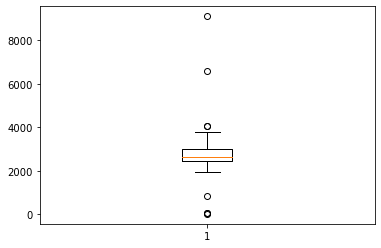

In [12]:
plt.boxplot(data_y)   
plt.show()	

[1. 1. 1. 1. 1. 1. 1. 1.]
[  51.    865.     22.     60.   6607.4  4060.3  9106.44 4065.2 ]


C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 37327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28070 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 38144 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\songfengyi\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning

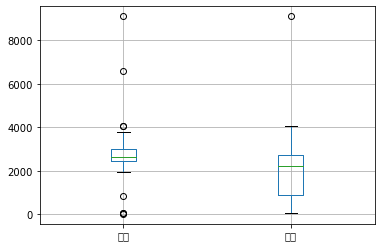

In [10]:

p=data.boxplot(return_type='dict')

x=p['fliers'][0].get_xdata()

y=p['fliers'][0].get_ydata()

print(x)
print(y)

